In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder

In [35]:
df = pd.read_csv("C:\\data science class\\assignments\\EDA2\\adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [36]:
df.info()
df.isnull().sum() #there is no null value so we can go further

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [37]:
#Data Transformation - Scaling - integer/float
'''when column vaulue is integer or float and big, we need to adjust the value to proper value,to compute our metrics
 Standardization:
 we need standard deviation=1 and mean =0
 It is useful when the features have different scales.
 It is less sensitive to outliers compared to Min-Max scaling.
 Preferred when the data distribution is approximately Gaussian.
 you will get negative value also.
 
 Normalization get the value in between range 0 to 1, for that we need coulmns minimum and maximum value
 It is useful when you need all features to be in a specific range.
 It is sensitive to outliers, as the maximum and minimum values are used for scaling.
 Useful when the original distribution of the data is not Gaussian.
 you will get only positive value.
'''
SS= StandardScaler()
MM= MinMaxScaler()

#first find numeric column
features_num= df.select_dtypes(int)
num_lst = features_num.columns.tolist()
num_lst

#apply standardization scaling..
df_SS=df.copy()
df_SS[num_lst]=SS.fit_transform(df_SS[num_lst])
df_SS

#apply normalization scaling..
df_MM=df.copy()
df_MM[num_lst]=MM.fit_transform(df_MM[num_lst])
df_MM

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


In [38]:
#Data Transformation - Scaling - string/Object
'''
One-Hot Encoding:
Avoids introducing artificial ordinal relationships between categories.
itable for algorithms that are sensitive to magnitude or order (e.g., linear models, SVMs).")
Provides seperate binary columns for each category.
when the data contain too much categories thenit will increase the dimension of sheet 

Label Encoding:
Simple and space-efficient.
Does not increase the dimensionality of the dataset.
Suitable for algorithms that can handle ordinal relationships
it has a disadvantage of priority due 

'''
#first find string contain column
features_cat= df.select_dtypes(object)
cat_lst = features_cat.columns.tolist()
cat_lst

#find less than 5 categories column and more than 5 categories column
# less than 5 categories column
OHE_col=[]
#more than 5 categories column
LE_col=[]
for col in cat_lst:
    if df[col].nunique()<5:
        OHE_col.append(col)
    else:
        LE_col.append(col)

#i am adding OHE data into Noramalization data
norm_data= df_MM.drop(columns=OHE_col)

OHE= OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_data= OHE.fit_transform(df[OHE_col])
ohe_features= OHE.get_feature_names_out(OHE_col)
df_OHE= pd.DataFrame(ohe_data, columns=ohe_features, index = df.index)

norm_ohe_data = pd.concat([norm_data,df_OHE],axis=1)

LE= LabelEncoder()

norm_ohe_data = norm_ohe_data.drop(columns=LE_col)
for cl in LE_col:
    norm_ohe_data[cl] = LE.fit_transform(df[cl])
final_df=norm_ohe_data 
final_df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,workclass,education,marital_status,occupation,relationship,race,native_country
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,0.0,1.0,1.0,0.0,7,9,4,1,1,4,39
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0.0,1.0,1.0,0.0,6,9,2,4,0,4,39
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0.0,1.0,1.0,0.0,4,11,0,6,1,4,39
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0.0,1.0,1.0,0.0,4,1,2,6,0,2,39
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,1.0,0.0,1.0,0.0,4,9,2,10,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,1.0,0.0,1.0,0.0,4,7,2,13,5,4,39
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,0.0,1.0,0.0,1.0,4,11,2,7,0,4,39
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,1.0,0.0,1.0,0.0,4,11,6,1,4,4,39
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,0.0,1.0,1.0,0.0,4,11,4,1,3,4,39


In [39]:
#create 2 new features 
print(df.head())
#1. age can sepeareted as 0, 20,35,50,60 lik young, adult, senior, elder and convert by LE
bin = [0, 20,35,50,60,100]
label = ['young', 'adult', 'senior', 'elder', 'old']
df['age_group']= pd.cut(df['age'], bins=bin, labels= label, right=False)
final_df['age_group'] = LE.fit_transform(df['age_group'])
final_df.head()

df['edu_work'] = df['education']+"_"+df['workclass']
final_df['edu_work'] = LE.fit_transform(df['edu_work'])
final_df.head()

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,workclass,education,marital_status,occupation,relationship,race,native_country,age_group,edu_work
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,0.0,1.0,1.0,0.0,7,9,4,1,1,4,39,3,73
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,0.0,1.0,1.0,0.0,6,9,2,4,0,4,39,1,72
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,0.0,1.0,1.0,0.0,4,11,0,6,1,4,39,3,85
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,0.0,1.0,1.0,0.0,4,1,2,6,0,2,39,1,12
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,1.0,0.0,1.0,0.0,4,9,2,10,5,2,5,0,70


age skewness is  0.5587433694130484


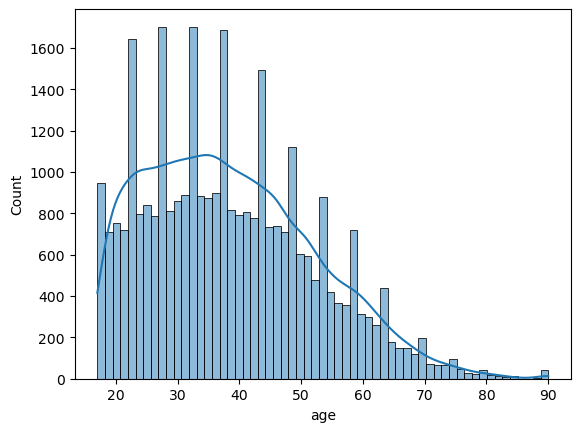

fnlwgt skewness is  1.4469800945789826


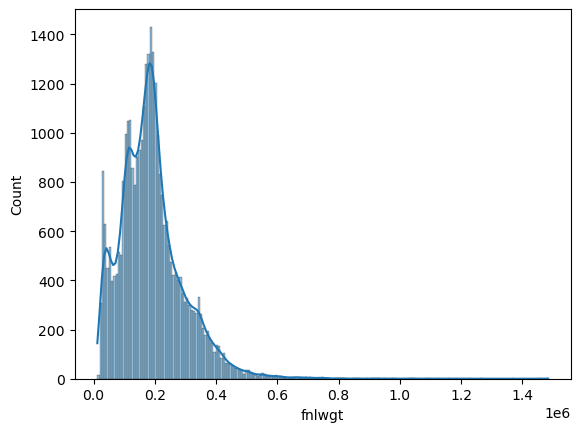

education_num skewness is  -0.3116758679102297


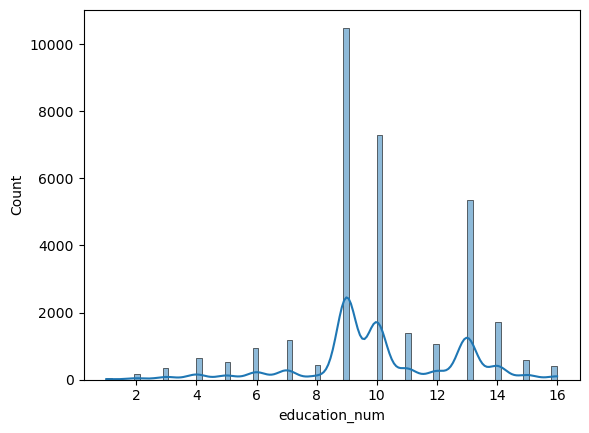

capital_gain skewness is  11.953847687699799


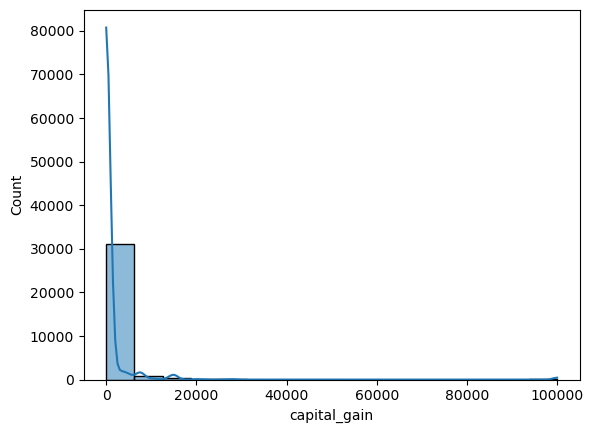

capital_loss skewness is  4.594629121679692


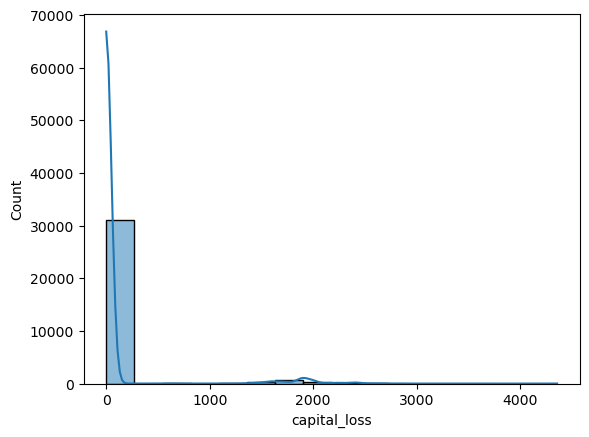

hours_per_week skewness is  0.22764253680450092


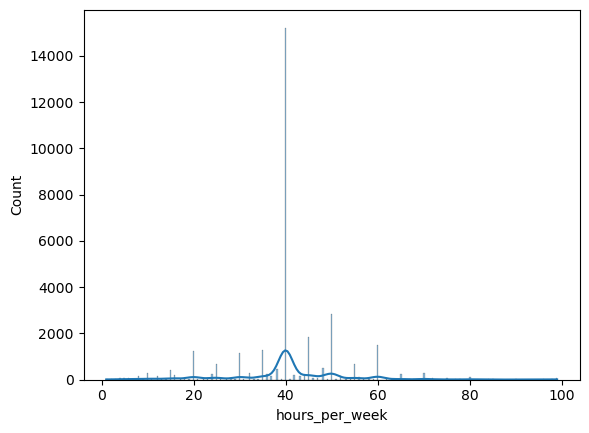

        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours_per_week  sex_ Female  sex_ Male  income_ <=50K  income_ >50K  \
0        0.397959          0.0        1.0            1.0           0.0   
1        0.122449          0.0        1.0            1.0           0.0   
2        0.397959          0.0        1.0            1.0           0.0   
3        0.397959          0.0        1.0            1.0           0.0   
4        0.397959          1.0        0.0            1.0           0.0   

   workclass  education  marital_status  occupation  relationship  race  \
0          7          9               4           1             1     4

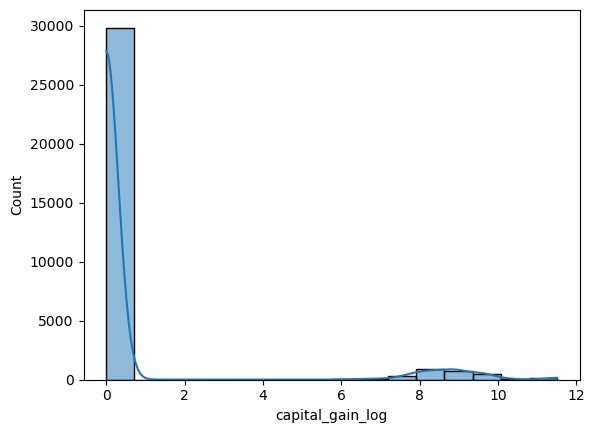

In [41]:
for col in df[num_lst]:
    print(col , "skewness is " , df[col].skew())
    sns.histplot(df[col], kde=True)
    plt.xlabel(col)
    plt.show()


#log transformation
#log1p is due tog log(0)=0
numerical_skew = "capital_gain"
final_df[numerical_skew + "_log"]=np.log1p(df[numerical_skew])
print(final_df.head())
sns.histplot(final_df["capital_gain_log"], kde=True)
plt.xlabel("capital_gain_log")
plt.show()